<a href="https://colab.research.google.com/github/braveendran27/OCV_2_Proj3/blob/master/Proj3_yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# the notebook expects OpenCV/C2_P3 folder in My Driver
#%cd /content/drive/My\ Drive/



In [2]:
#1. Downloading the repo 
#2. building darknet 
#3. downloading the trainign images and test images

!git clone https://github.com/braveendran27/OCV_2_Proj3.git OCV_2_Proj3Y4
%cd OCV_2_Proj3Y4






Cloning into 'OCV_2_Proj3Y4'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 371 (delta 104), reused 290 (delta 47), pack-reused 0
Receiving objects: 100% (371/371), 9.54 MiB | 7.48 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/OCV_2_Proj3Y4


In [3]:
#building darknet : Darknet source code is already included as a part of my repo
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
print("Building. . . It might take 2 minutes")
!make &> build_log.txt
print("Build completed.")
%cd ..

Cloning into 'darknet'...
remote: Enumerating objects: 15316, done.
remote: Total 15316 (delta 0), reused 0 (delta 0), pack-reused 15316
Receiving objects: 100% (15316/15316), 13.72 MiB | 10.90 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.
/content/OCV_2_Proj3Y4/darknet
Building. . . It might take 2 minutes
Build completed.
/content/OCV_2_Proj3Y4


In [4]:

!mkdir mask_no-mask_dataset
%cd mask_no-mask_dataset
#get the training images
!wget "https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1" -O mask_no-mask_dataset.zip
!unzip mask_no-mask_dataset.zip &> /dev/null
%cd ..

%cd test
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O ./test-video1.mp4
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O ./test-video2.mp4
%cd ..

/content/OCV_2_Proj3Y4/mask_no-mask_dataset
--2021-10-15 13:28:13--  https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip [following]
--2021-10-15 13:28:14--  https://www.dropbox.com/s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucda3d16372a61d75e54832dca64.dl.dropboxusercontent.com/cd/0/get/BYGVq7phhF_EwIqtIxOVJthmqZ3uSpwqa9LjyjOvejW_xiAI8bmWdJ3CPSJfgCHFXUie0vtIFvwzjxGvGQxKKEQuZHwQFgnDG_8rTk9jM9YYjCUUUaEzcrjMWiiT4KCiSwCvVaj8qu4hrTj9Tljjb3fk/file?dl=1# [following]
--2021-10-15 13:28:14--  https://ucda3d16372a61d75e54832dca64.dl.dropboxusercontent.com/cd/0/get/BYGVq

In [5]:
#trainign yolo v4
%cd yolov4/
!mkdir maskbackup
!mkdir output
#download the initial weights darknet53.conv
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp" -o yolov4.conv.137
#start the training
!./../darknet/darknet detector train yolov4-mask-setup.data yolov4-obj.cfg ./yolov4.conv.137 -dont_show -map 2> train_log.txt




Streaming output truncated to the last 5000 lines.
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.103613 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 88.33 %, best = 88.33 % 
 3131: 2.639727, 2.894389 avg loss, 0.000100 rate, 5.865491 seconds, 200384 images, 1.649910 hours left
Loaded: 0.000060 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 88.33 %, best = 88.33 % 
 3132: 2.819319, 2.886882 avg loss, 0.000100 rate, 5.871543 seconds, 200448 images, 1.650234 hours left
Loaded: 0.000056 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 88.33 %, best = 88.33 % 
 3133: 1.941168, 2.792311 avg loss, 0.000100 rate, 6.144003 seconds, 200512 images, 1.647888 hours left
Loaded: 0.000053 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 88.33 %, best = 88.33 % 
 3134: 2.675671, 2.780647 av

In [6]:
%%writefile display.py 
import cv2
import matplotlib.pyplot as plt


def display_output(OrgimagePath,Predicted):
    src = cv2.imread(OrgimagePath)
    output = cv2.imread(Predicted)

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

Writing display.py


/content/OCV_2_Proj3Y4/yolov4/data
/content/OCV_2_Proj3Y4/yolov4/data/labels
/content/OCV_2_Proj3Y4/yolov4/data
/content/OCV_2_Proj3Y4/yolov4
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 249 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image1.jpg: Predicted in 18.998000 milli-seconds.
WithMask: 100%


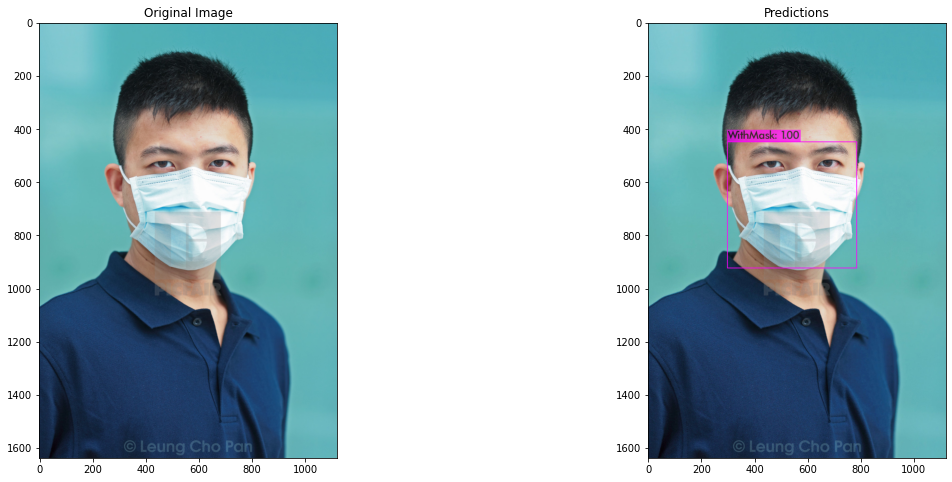

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 249 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image2.jpg: Predicted in 18.790000 milli-seconds.
WithMask: 100%
WithMask: 97%
WithMask: 63%
NoMask: 99%
WithMask: 93%


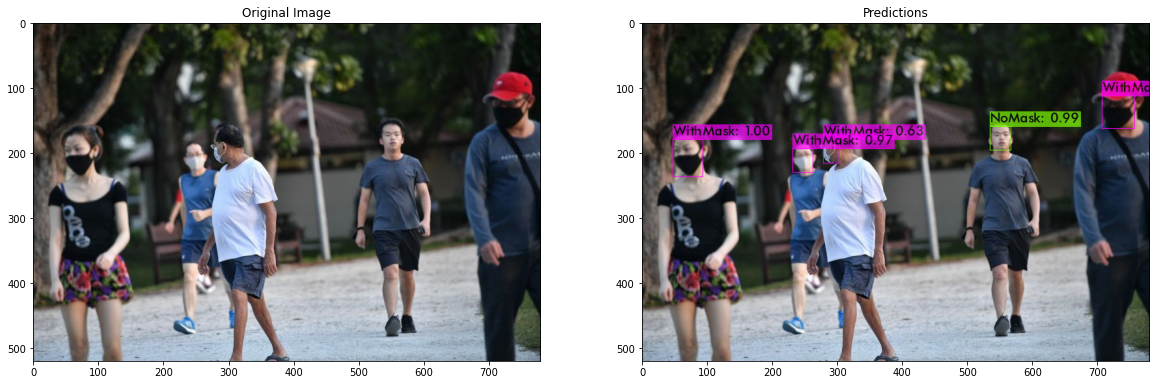

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 249 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image3.jpg: Predicted in 18.956000 milli-seconds.
WithMask: 76%
WithMask: 100%
WithMask: 99%
NoMask: 84%
WithMask: 100%
WithMask: 99%
WithMask: 100%
WithMask: 85%
WithMask: 100%
WithMask: 93%
WithMask: 99%
WithMask: 99%
WithMask: 100%
WithMask: 99%
WithMask: 100%
WithMask: 100%
WithMask: 98%
WithMask: 100%
WithMask: 99%


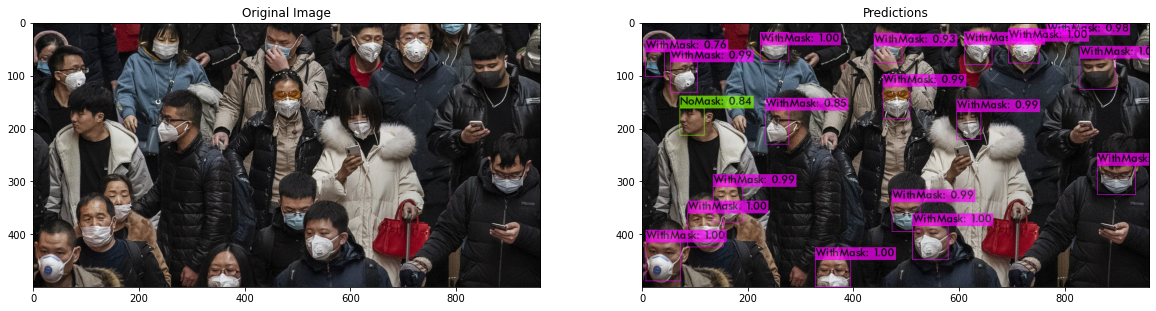

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 249 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image4.jpg: Predicted in 18.767000 milli-seconds.
NoMask: 82%
NoMask: 77%
WithMask: 99%
WithMask: 62%
WithMask: 100%
NoMask: 75%
WithMask: 99%
NoMask: 63%
WithMask: 100%


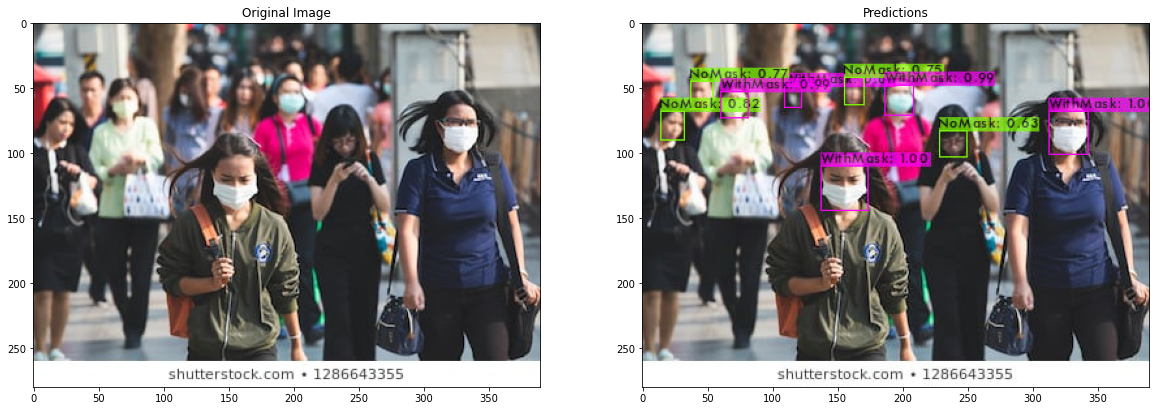

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:

NoMask: 93% 
NoMask: 79% 
NoMask: 64% 
WithMask: 66% 

FPS:25.9 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 91% 
NoMask: 90% 
NoMask: 76% 
WithMask: 78% 

FPS:26.5 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 94% 
NoMask: 84% 
NoMask: 72% 
WithMask: 67% 

FPS:27.9 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 94% 
NoMask: 84% 
NoMask: 69% 
WithMask: 69% 

FPS:28.8 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 90% 
NoMask: 63% 
NoMask: 62% 
WithMask: 71% 

FPS:29.2 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 93% 
NoMask: 79% 
WithMask: 88% 

FPS:30.6 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 89% 
NoMask: 72% 
WithMask: 67% 

FPS:31.6 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 75% 
WithMask: 87% 

FPS:32.2 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 78% 
NoMask: 67% 
WithMask: 74% 

FPS:31.0 	 AVG_FPS:25.8

 cvWriteFrame 
Objects:

NoMask: 78% 
NoMask: 73% 
WithMask: 73% 

FP

In [7]:
#Run the inference
#Copt the labels otherwise the pictures will not have lables correct
execfile('display.py')
!mkdir data
%cd data
!mkdir labels
%cd labels
!cp ./../../../darknet/data/labels/*.* .
%cd ..
%cd ..

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image1.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image1_pred.jpg
display_output("./../test/test-image1.jpg","./output/test-image1_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image2.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image2_pred.jpg
display_output("./../test/test-image2.jpg","./output/test-image2_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image3.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image3_pred.jpg
display_output("./../test/test-image3.jpg","./output/test-image3_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image4.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image4_pred.jpg
display_output("./../test/test-image4.jpg","./output/test-image4_pred.jpg")

!./../darknet/darknet detector demo yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-video1.mp4 -thresh .6 -out_filename ./output/out-vid1.avi -dont_show 2>/dev/null


!./../darknet/darknet detector demo yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-video2.mp4 -thresh .6 -out_filename ./output/out-vid2.avi -dont_show 2>/dev/null


# New Section

# New Section